In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import nibabel as nib
from scipy.ndimage import map_coordinates
import torch

In [18]:
# Image number 10
image_path = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/Abdomen/imagesTr/img0010_tcia_CT.nii.gz"
disp_field_path = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/Output/disp.nii.gz"
mr_image_path = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/Abdomen/imagesTr/img0010_tcia_MR.nii.gz"

# Load the images
image = sitk.ReadImage(image_path)
mr_image = sitk.ReadImage(mr_image_path)
print(image.GetSize())

# Load the displacement field as a scalar image
displacement_field_img = sitk.ReadImage(disp_field_path)

(192, 160, 192)


In [19]:
image_array = sitk.GetArrayFromImage(image)
displacement_field_array = sitk.GetArrayFromImage(displacement_field_img)
print(displacement_field_array.shape)
print(image_array.shape)

mr_image_array = sitk.GetArrayFromImage(mr_image)

D, H, W = image_array.shape

(3, 192, 160, 192)
(192, 160, 192)


In [20]:
z, y, x = np.meshgrid(np.arange(D), np.arange(H), np.arange(W), indexing='ij', sparse=False)

x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()
print(x_flat.shape)

disp_x = displacement_field_array[0].flatten()
disp_y = displacement_field_array[1].flatten()
disp_z = displacement_field_array[2].flatten()
print(disp_x.shape)

x_source = x_flat - disp_x
y_source = y_flat - disp_y
z_source = z_flat - disp_z

source_coords = np.vstack((z_source, y_source, x_source))

(5898240,)
(5898240,)


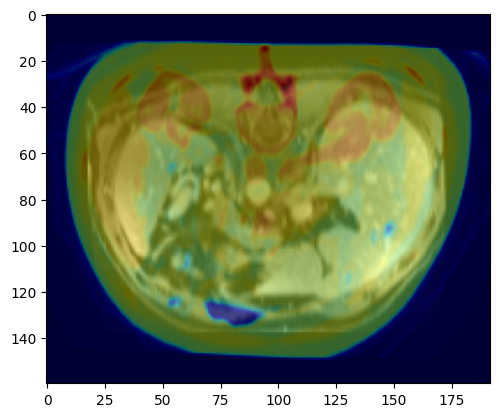

In [21]:
warped_image = map_coordinates(image_array, source_coords, order=1, mode='nearest').reshape((D, H, W))

plt.imshow(mr_image_array[100], cmap='gray')
plt.imshow(warped_image[100], cmap='jet', alpha=0.4)
plt.show()

In [22]:
displacement_field_array = np.transpose(displacement_field_array, (3, 2, 1, 0))
    
displacement_field_vector = sitk.GetImageFromArray(displacement_field_array, isVector=True)
    
displacement_field_vector.CopyInformation(image)
    
displacement_field_vector = sitk.Cast(displacement_field_vector, sitk.sitkVectorFloat64)
    
displacement_transform = sitk.DisplacementFieldTransform(displacement_field_vector)
    
# Resample (warp) the CT image to align with the MR image
warped_ct_image = sitk.Resample(
    image,
    mr_image,  # Use the MR image as a reference
    displacement_transform,  # Displacement field transform
    sitk.sitkBSpline,  # Interpolation method
    0.0,  # Default pixel value for areas outside the image
    image.GetPixelID()  # Ensure output image type matches the MR image
)

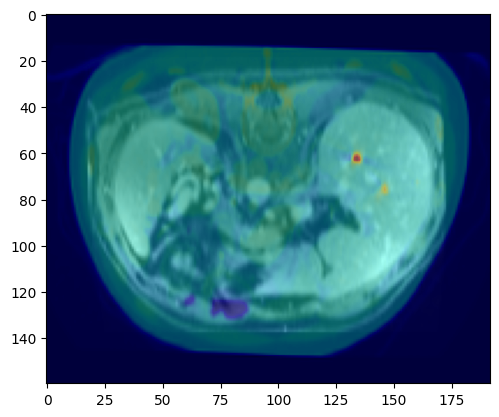

In [23]:
warped_ct_array = sitk.GetArrayFromImage(warped_ct_image)

plt.imshow(mr_image_array[100], cmap='gray')
plt.imshow(warped_ct_array[100], cmap='jet', alpha=0.4)

In [24]:
# Image number 16
image_path2 = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/Abdomen/imagesTr/img0016_tcia_CT.nii.gz"
disp_field_path2 = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/Output/disp16.nii.gz"
mr_image_path2 = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/Abdomen/imagesTr/img0016_tcia_MR.nii.gz"

# Load the images
image2 = sitk.ReadImage(image_path2)
mr_image2 = sitk.ReadImage(mr_image_path2)
print(image2.GetSize())

# Load the displacement field as a scalar image
displacement_field_img2 = sitk.ReadImage(disp_field_path2)

(192, 160, 192)


In [25]:
image_array = sitk.GetArrayFromImage(image2)
displacement_field_array = sitk.GetArrayFromImage(displacement_field_img2)
print(displacement_field_array.shape)
print(image_array.shape)

mr_image_array = sitk.GetArrayFromImage(mr_image2)

D, H, W = image_array.shape

(3, 192, 160, 192)
(192, 160, 192)


In [26]:
z, y, x = np.meshgrid(np.arange(D), np.arange(H), np.arange(W), indexing='ij', sparse=False)

x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()
print(x_flat.shape)

disp_x = displacement_field_array[0].flatten()
disp_y = displacement_field_array[1].flatten()
disp_z = displacement_field_array[2].flatten()
print(disp_x.shape)

x_source = x_flat - disp_x
y_source = y_flat - disp_y
z_source = z_flat - disp_z

source_coords = np.vstack((z_source, y_source, x_source))

(5898240,)
(5898240,)


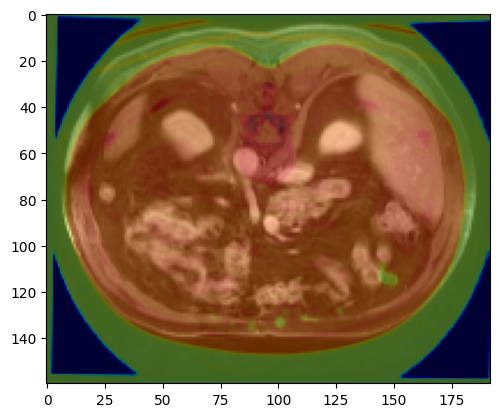

In [27]:
warped_image = map_coordinates(image_array, source_coords, order=1, mode='nearest').reshape((D, H, W))

plt.imshow(mr_image_array[100], cmap='gray')
plt.imshow(warped_image[100], cmap='jet', alpha=0.4)
plt.show()

In [28]:
displacement_field_array = np.transpose(displacement_field_array, (3, 2, 1, 0))
    
displacement_field_vector = sitk.GetImageFromArray(displacement_field_array, isVector=True)
    
displacement_field_vector.CopyInformation(image)
    
displacement_field_vector = sitk.Cast(displacement_field_vector, sitk.sitkVectorFloat64)
    
displacement_transform = sitk.DisplacementFieldTransform(displacement_field_vector)
    
# Resample (warp) the CT image to align with the MR image
warped_ct_image = sitk.Resample(
    image,
    mr_image,  # Use the MR image as a reference
    displacement_transform,  # Displacement field transform
    sitk.sitkBSpline,  # Interpolation method
    0.0,  # Default pixel value for areas outside the image
    image.GetPixelID()  # Ensure output image type matches the MR image
)

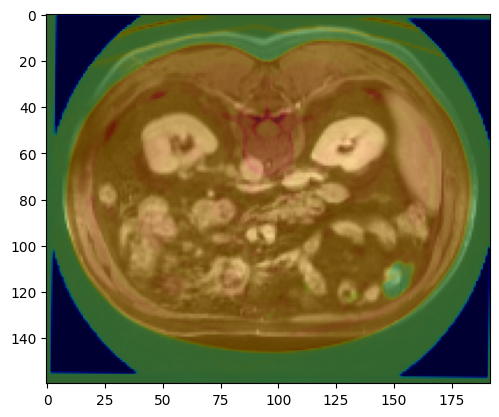

In [41]:
plt.imshow(mr_image_array[90, :, :], cmap='gray')
plt.imshow(image_array[90, :, :], cmap='jet', alpha=0.4)

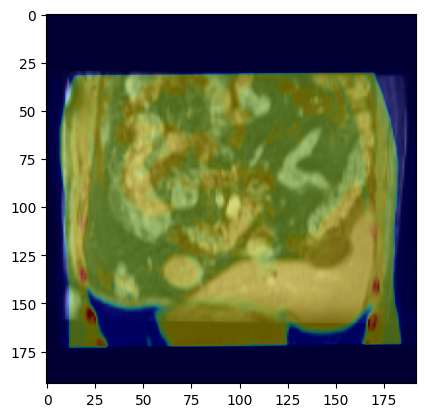

In [44]:
plt.imshow(mr_image_array[:, 90, :], cmap='gray')
plt.imshow(image_array[:, 90, :], cmap='jet', alpha=0.4)

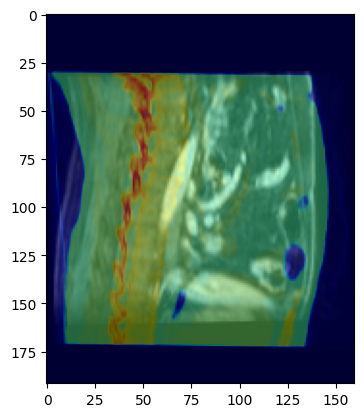

In [45]:
plt.imshow(mr_image_array[:, :, 90], cmap='gray')
plt.imshow(image_array[:, :, 90], cmap='jet', alpha=0.4)

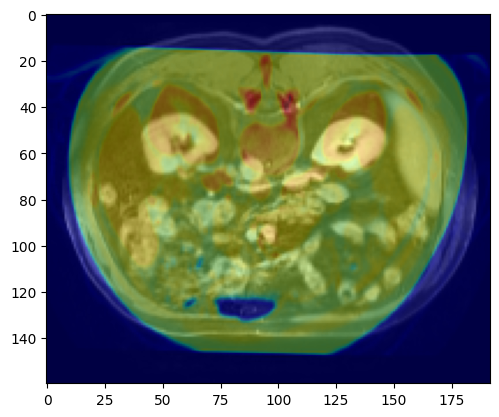

In [40]:
warped_ct_array = sitk.GetArrayFromImage(warped_ct_image)

plt.imshow(mr_image_array[90, :, :], cmap='gray')
plt.imshow(warped_ct_array[90, :, :], cmap='jet', alpha=0.4)

(192, 160, 192)
(192, 160, 192)


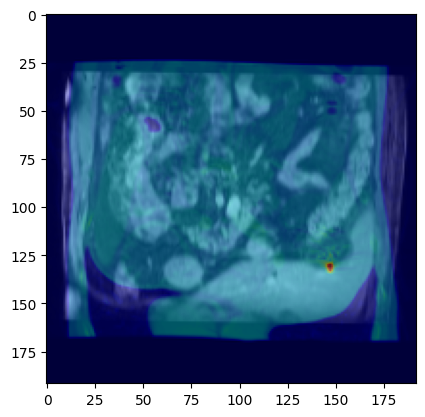

In [38]:
print(warped_ct_array.shape)
print(mr_image_array.shape)

plt.imshow(mr_image_array[:, 90, :], cmap='gray')
plt.imshow(warped_ct_array[:, 90, :], cmap='jet', alpha=0.4)

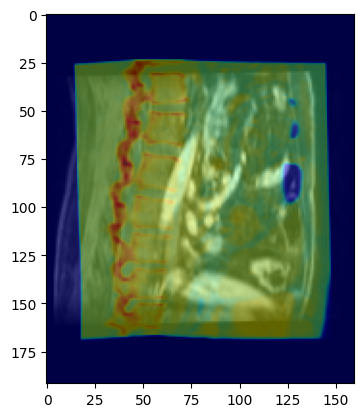

In [39]:
plt.imshow(mr_image_array[:, :, 90], cmap='gray')
plt.imshow(warped_ct_array[:, :, 90], cmap='jet', alpha=0.4)

In [46]:
optimized_parameters = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/Output/optimized_params.pt"

# Load the optimized parameters
optimized_params = torch.load(optimized_parameters)

# Load the best parameters
best_rank = np.argmax(optimized_params[0]) # In this example best rank is in number 9
dice = optimized_params[1][best_rank]
jstd = optimized_params[2][best_rank]
hd95 = optimized_params[3][best_rank]
t_convex = optimized_params[4][best_rank]

print("Best rank: ", best_rank)
print("Dice: ", dice)
print("JSTD: ", jstd)
print("HD95: ", hd95)
print("T_convex: ", t_convex)


Best rank:  tensor(9)
Dice:  tensor([0.2073, 0.0259])
JSTD:  tensor([0.0390, 0.0000])
HD95:  tensor(23.2093)
T_convex:  tensor(0.6942)


/tmp/ipykernel_79803/3820533812.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  optimized_params = torch.load(optimized_parameters)


In [ ]:
# Define paths to saved files
output_adam_path = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/OutputAdamOptimization/optimized_params_adam.pt"
output_jac_path = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/OutputAdamJac/jac.pt"

In [16]:
# Load data
adam_data = torch.load(output_adam_path)
jac_data = torch.load(output_jac_path)

# Extract data in correct order
rank_data, dice_data, jstd_data, hd95_data = adam_data

# Reshape rank_data to match dice_data shape
rank_data_reshaped = rank_data.view(75, 4, 4)

# Find best configuration index based on rank
best_rank_index = rank_data_reshaped.argmin()
best_config_idx = torch.unravel_index(best_rank_index, rank_data_reshaped.shape)

# Retrieve best metrics
best_dice_scores = dice_data[best_config_idx]
best_jstd_scores = jstd_data[best_config_idx]
best_hd95_scores = hd95_data[best_config_idx]

print("\n--- Results Summary ---\n")

print(f"Best Rank: {rank_data_reshaped[best_config_idx].item()}")
print(f"Best Dice scores (mean, robust): {best_dice_scores[..., 0].tolist()}")
print(f"Best JSTD scores (mean, robust): {best_jstd_scores[..., 0].tolist()}")
print(f"Best HD95 scores: {best_hd95_scores.tolist()}")

print("\n--- Detailed Metrics for Best Configuration ---\n")

print(f"Dice Scores (mean, robust): {best_dice_scores}")
print(f"JSTD Scores (mean, robust): {best_jstd_scores}")
print(f"HD95 Scores: {best_hd95_scores}")

# Jacobian determinant statistics
best_jacobian_data = jac_data[best_config_idx]
print("\n--- Jacobian Determinants ---")
print(f"Mean Jacobian Determinant: {best_jacobian_data.mean().item()}")
print(f"Std Dev of Jacobian Determinant: {best_jacobian_data.std().item()}")



--- Results Summary ---

Best Rank: 0.1327342689037323
Best Dice scores (mean, robust): 0.4091970920562744
Best JSTD scores (mean, robust): 0.0009092676336877048
Best HD95 scores: 16.973970413208008

--- Detailed Metrics for Best Configuration ---

Dice Scores (mean, robust): tensor([0.4092, 0.2948])
JSTD Scores (mean, robust): tensor([0.0009, 0.0000])
HD95 Scores: 16.973970413208008

--- Jacobian Determinants ---
Mean Jacobian Determinant: 0.0008690687827765942
Std Dev of Jacobian Determinant: 2.722335011640098e-05


/tmp/ipykernel_79803/1505631773.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adam_data = torch.load(output_adam_path)
/tmp/ipykernel_79803/1505631773.py:3: FutureWarn

In [39]:
# Infer_convexadam
image_path = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/Abdomen/imagesTr/img0010_tcia_CT.nii.gz"
disp_field_path = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/InferConvexAdamOutput/disp_0010_to_0010.nii.gz"
mr_image_path = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/Abdomen/imagesTr/img0010_tcia_MR.nii.gz"

# Load the images
image = sitk.ReadImage(image_path)
mr_image = sitk.ReadImage(mr_image_path)
print(image.GetSize())

# Load the displacement field as a scalar image
displacement_field_img = sitk.ReadImage(disp_field_path)

(192, 160, 192)


In [40]:
image_array = sitk.GetArrayFromImage(image)
displacement_field_array = sitk.GetArrayFromImage(displacement_field_img)
print(displacement_field_array.shape)
print(image_array.shape)

mr_image_array = sitk.GetArrayFromImage(mr_image)

D, H, W = image_array.shape

(3, 192, 160, 192)
(192, 160, 192)


In [ ]:
displacement_field_array = np.transpose(displacement_field_array, (3, 2, 1, 0))
    
displacement_field_vector = sitk.GetImageFromArray(displacement_field_array, isVector=True)
    
displacement_field_vector.CopyInformation(image)
    
displacement_field_vector = sitk.Cast(displacement_field_vector, sitk.sitkVectorFloat64)
    
displacement_transform = sitk.DisplacementFieldTransform(displacement_field_vector)
    
# Resample (warp) the CT image to align with the MR image
warped_ct_image = sitk.Resample(
    image,
    mr_image,  # Use the MR image as a reference
    displacement_transform,  # Displacement field transform
    sitk.sitkBSpline,  # Interpolation method
    0.0,  # Default pixel value for areas outside the image
    image.GetPixelID()  # Ensure output image type matches the MR image
)

print(warped_ct_image.GetSize())

(192, 160, 192)


In [36]:
# Convert the warped CT image to a NumPy array
warped_ct_image_array = sitk.GetArrayFromImage(warped_ct_image)

# Ensure you select a 2D slice (e.g., the 90th slice along the first axis)
slice_index = 90
mr_image_slice = mr_image_array[slice_index, :, :]
warped_ct_image_slice = warped_ct_image_array[slice_index, :, :]

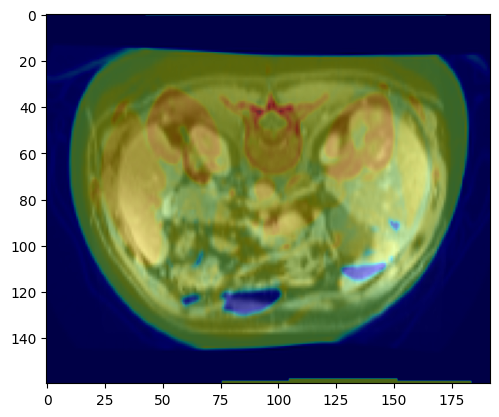

In [43]:
warped_ct_array = sitk.GetArrayFromImage(warped_ct_image)

plt.imshow(mr_image_array[90, :, :], cmap='gray')
plt.imshow(warped_ct_array[90, :, :], cmap='jet', alpha=0.4)

2
(192, 192, 208)


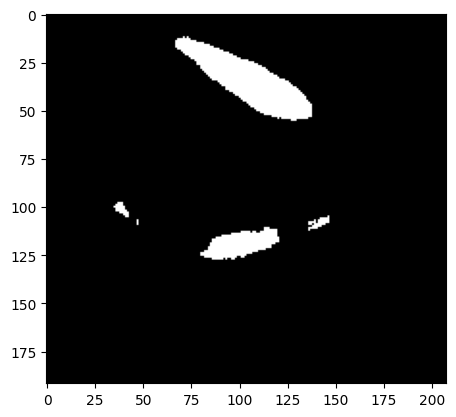

In [2]:
segment_image = nib.load("/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/Abdomen/CT_to_CT/training/Test/case_011_exp.nii.gz")
segment_image_array = segment_image.get_fdata().astype(np.int32)
print(len(np.unique(segment_image_array)))
print(segment_image_array.shape)
plt.imshow(segment_image_array[90, :, :], cmap='gray')

In [ ]:
data_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/CT_CT/Output/optimized_params.pt'
data = torch.load(data_path)
rank = data[0]
dice = data[1]
jstd = data[2]
hd95 = data[3]
t_convex = data[4]

best_config_idx = np.argmax(rank) - 7 # -7 because 7 configurations were sciped due to memory issues
print("Best configuration index: ", best_config_idx)
print("Best configuration dice: ", dice[best_config_idx])
print("Best configuration jstd: ", jstd[best_config_idx])
print("Best configuration hd95: ", hd95[best_config_idx])
print("Best configuration t_convex: ", t_convex[best_config_idx])

Best configuration index:  tensor(77)
Best configuration dice:  tensor([0.8699, 0.8699])
Best configuration jstd:  tensor([0.0441, 0.0000])
Best configuration hd95:  tensor(13.6694)
Best configuration t_convex:  tensor(1.8428)


/tmp/ipykernel_29595/3529809487.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)


/tmp/ipykernel_4452/1713708023.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  optimized_parameters_data = torch.load(optimized_parameters_data_path)
/tmp/ipykernel_4452

Best setting index: 64, Iteration: 3, Stage: 3


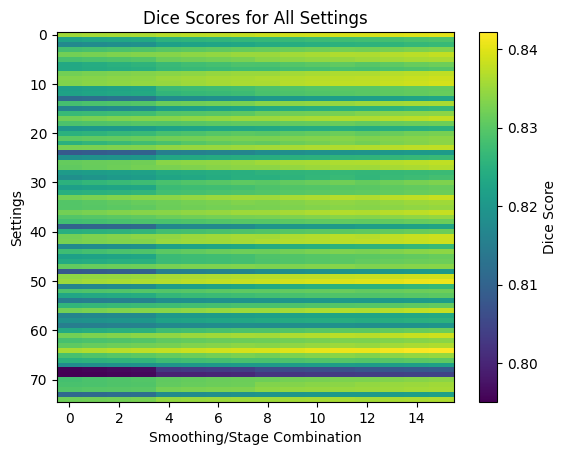

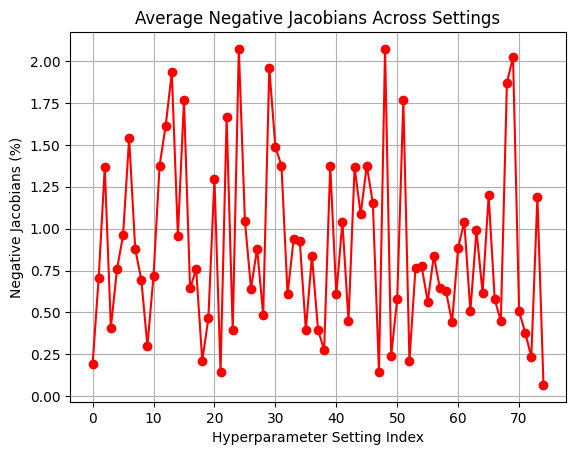

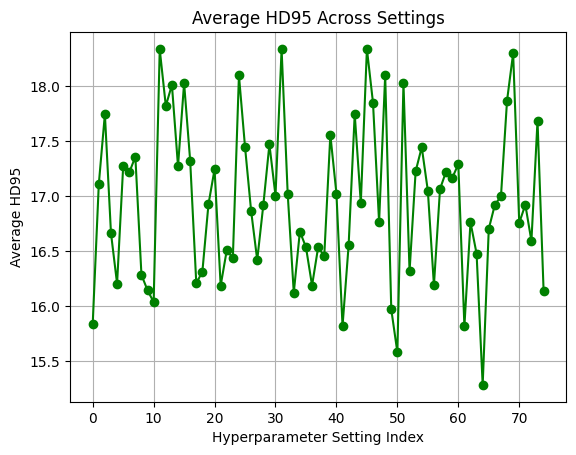

In [18]:
optimized_parameters_data_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/CT_CT/OutputAdam/optimized_params_adam.pt'
jacobi_data_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/CT_CT/OutputJacobi/jac_params.pt'

optimized_parameters_data = torch.load(optimized_parameters_data_path)
jacobi_data = torch.load(jacobi_data_path)

rank2 = optimized_parameters_data[0]
dice2 = optimized_parameters_data[1]
jstd2 = optimized_parameters_data[2]
hd95_2 = optimized_parameters_data[3]

# Flatten to 2D for visualization
dice_flat = dice2[..., 0].reshape(75, -1)

# Flatten the Dice scores for easy searching
best_index = torch.argmax(dice2[..., 0])

# Decode the indices
s = best_index // 16  # Setting index
ii = (best_index % 16) // 4  # Iteration (smoothing operation)
kk = best_index % 4  # Stage (displacement grid level)

print(f"Best setting index: {s}, Iteration: {ii}, Stage: {kk}")

# Plot heatmap
plt.imshow(dice_flat, aspect='auto', cmap='viridis')
plt.colorbar(label="Dice Score")
plt.title("Dice Scores for All Settings")
plt.xlabel("Smoothing/Stage Combination")
plt.ylabel("Settings")
plt.show()

avg_neg_jac = jstd2[..., 1].mean(dim=(1, 2)) * 100  # Convert to percentage

plt.plot(range(len(avg_neg_jac)), avg_neg_jac.numpy(), marker='o', color='red')
plt.xlabel("Hyperparameter Setting Index")
plt.ylabel("Negative Jacobians (%)")
plt.title("Average Negative Jacobians Across Settings")
plt.grid(True)
plt.show()

# Average across iterations and stages for each setting
avg_hd95 = hd95_2.mean(dim=(1, 2))

plt.plot(range(len(avg_hd95)), avg_hd95.numpy(), marker='o', color='green')
plt.xlabel("Hyperparameter Setting Index")
plt.ylabel("Average HD95")
plt.title("Average HD95 Across Settings")
plt.grid(True)
plt.show()

(3, 208, 192, 192)
(208, 192, 192)
(208, 192, 192, 3)


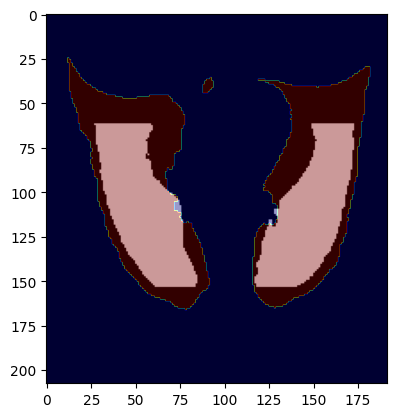

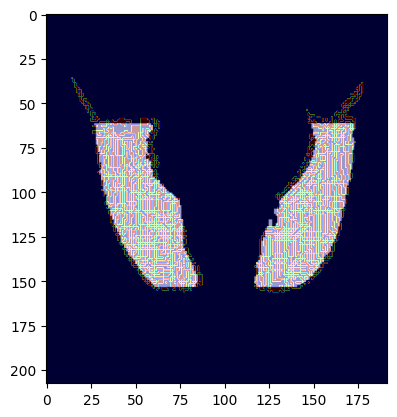

In [21]:
lung_expiration_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/Abdomen/CT_to_CT/training/lungMasks/case_001_exp.nii.gz' # Fixed image
lung_inspiration_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/Abdomen/CT_to_CT/training/lungMasks/case_001_insp.nii.gz' # Moving image

# Load the images
lung_expiration = sitk.ReadImage(lung_expiration_path)
lung_inspiration = sitk.ReadImage(lung_inspiration_path)

# Load displacement field
displacement_field = sitk.ReadImage('/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/CT_CT/DisplacementField/disp_0001_to_0001.nii.gz')

displacement_field_array = sitk.GetArrayFromImage(displacement_field)
lung_expiration_array = sitk.GetArrayFromImage(lung_expiration)
lung_inspiration_array = sitk.GetArrayFromImage(lung_inspiration)

print(displacement_field_array.shape)
print(lung_inspiration_array.shape)

displacement_field_array = np.transpose(displacement_field_array, (1, 2, 3, 0))
print(displacement_field_array.shape)
    
displacement_field_vector = sitk.GetImageFromArray(displacement_field_array, isVector=True)
    
displacement_field_vector.CopyInformation(lung_inspiration)
    
displacement_field_vector = sitk.Cast(displacement_field_vector, sitk.sitkVectorFloat64)
    
displacement_transform = sitk.DisplacementFieldTransform(displacement_field_vector)

warped_inspiratory_lung = sitk.Resample(
    lung_inspiration,
    lung_expiration,
    displacement_transform,
    sitk.sitkBSpline,
    0.0,
    lung_inspiration.GetPixelID()
)

warped_inspiratory_lung_array = sitk.GetArrayFromImage(warped_inspiratory_lung)

slice_index = 90
lung_expiration_slice = lung_expiration_array[: ,slice_index, :]
lung_inspiration_slice = lung_inspiration_array[:, slice_index, :]
warped_inspiratory_lung_slice = warped_inspiratory_lung_array[:, slice_index, :]

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(lung_inspiration_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(warped_inspiratory_lung_slice, cmap='jet', alpha=0.4)
plt.show()

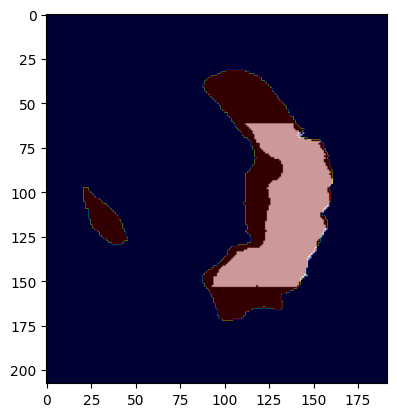

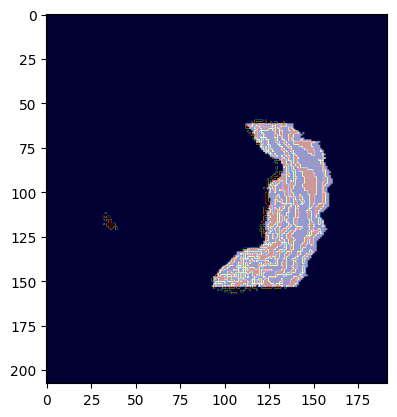

In [29]:
lung_expiration_slice = lung_expiration_array[: , :, slice_index]
lung_inspiration_slice = lung_inspiration_array[:, :, slice_index]
warped_inspiratory_lung_slice = warped_inspiratory_lung_array[:, :, slice_index]

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(lung_inspiration_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(warped_inspiratory_lung_slice, cmap='jet', alpha=0.4)
plt.show()

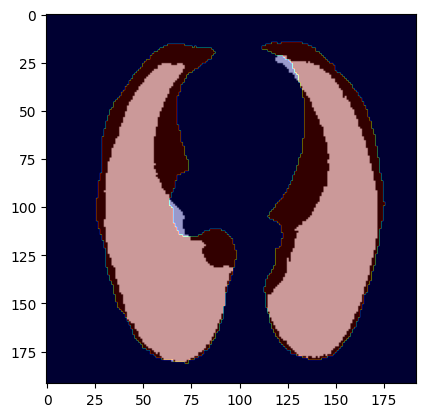

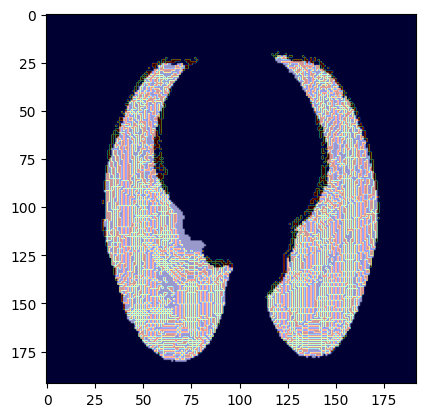

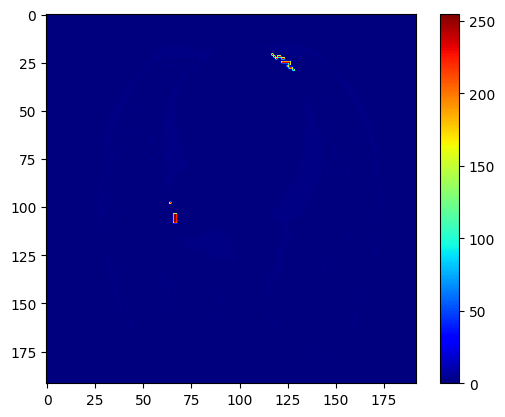

In [22]:
lung_expiration_slice = lung_expiration_array[slice_index, :, :]
lung_inspiration_slice = lung_inspiration_array[slice_index, :, :]
warped_inspiratory_lung_slice = warped_inspiratory_lung_array[slice_index, :, :]

diff = lung_inspiration_slice - warped_inspiratory_lung_slice

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(lung_inspiration_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(warped_inspiratory_lung_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(diff, cmap='jet')
plt.colorbar()
plt.show()

(3, 192, 192, 256)
(192, 192, 256)
(192, 192, 256, 3)


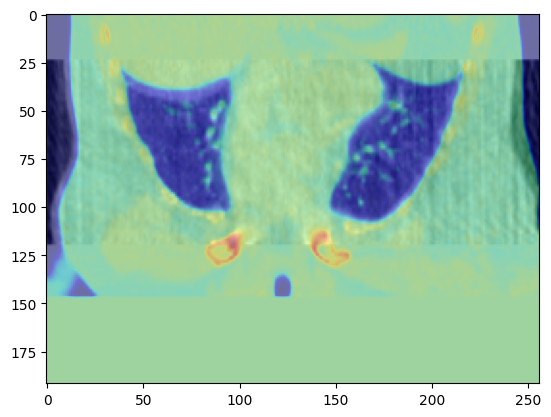

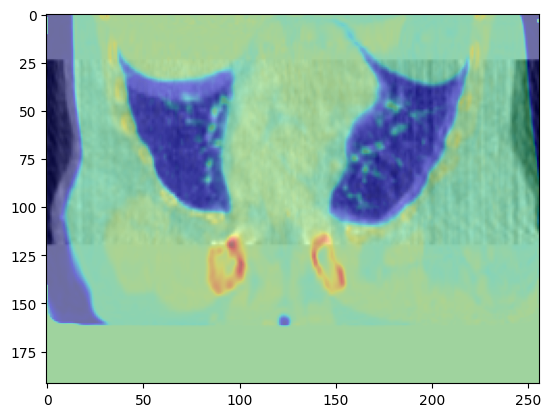

In [31]:
lung_expiration_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/AMS_Images/ThoraxCBCT_OncoRegRelease_06_12_23/Release_06_12_23/imagesTr/ThoraxCBCT_0000_0001.nii.gz' # Fixed image
lung_inspiration_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/AMS_Images/ThoraxCBCT_OncoRegRelease_06_12_23/Release_06_12_23/imagesTr/ThoraxCBCT_0000_0000.nii.gz' # Moving image

# Load the images
lung_expiration = sitk.ReadImage(lung_expiration_path)
lung_inspiration = sitk.ReadImage(lung_inspiration_path)

# Load displacement field
displacement_field = sitk.ReadImage('/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/AMS_Images/DisplacementFieldsMIND/disp.nii.gz')

displacement_field_array = sitk.GetArrayFromImage(displacement_field)
lung_expiration_array = sitk.GetArrayFromImage(lung_expiration)
lung_inspiration_array = sitk.GetArrayFromImage(lung_inspiration)

print(displacement_field_array.shape)
print(lung_inspiration_array.shape)

displacement_field_array = np.transpose(displacement_field_array, (1, 2, 3, 0))
print(displacement_field_array.shape)
    
displacement_field_vector = sitk.GetImageFromArray(displacement_field_array, isVector=True)
    
displacement_field_vector.CopyInformation(lung_inspiration)
    
displacement_field_vector = sitk.Cast(displacement_field_vector, sitk.sitkVectorFloat64)
    
displacement_transform = sitk.DisplacementFieldTransform(displacement_field_vector)

warped_inspiratory_lung = sitk.Resample(
    lung_inspiration,
    lung_expiration,
    displacement_transform,
    sitk.sitkBSpline,
    0.0,
    lung_inspiration.GetPixelID()
)

warped_inspiratory_lung_array = sitk.GetArrayFromImage(warped_inspiratory_lung)

slice_index = 90
lung_expiration_slice = lung_expiration_array[: ,slice_index, :]
lung_inspiration_slice = lung_inspiration_array[:, slice_index, :]
warped_inspiratory_lung_slice = warped_inspiratory_lung_array[:, slice_index, :]

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(lung_inspiration_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(warped_inspiratory_lung_slice, cmap='jet', alpha=0.4)
plt.show()

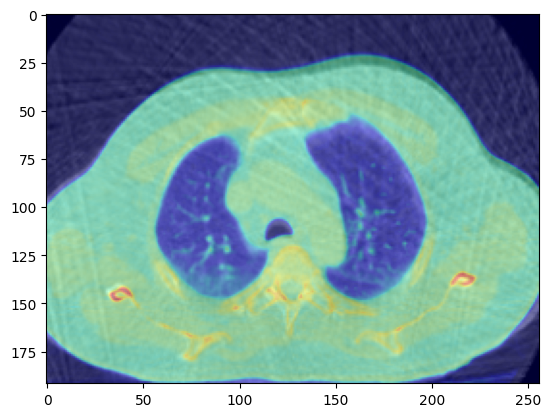

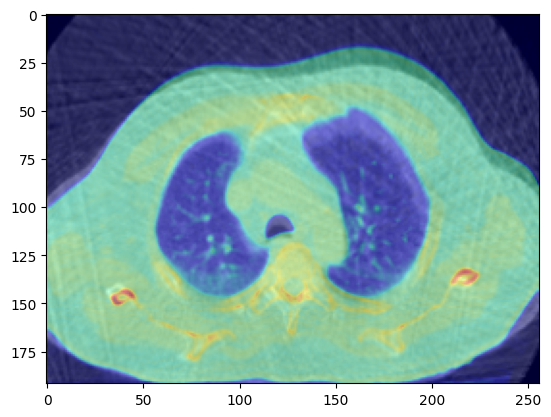

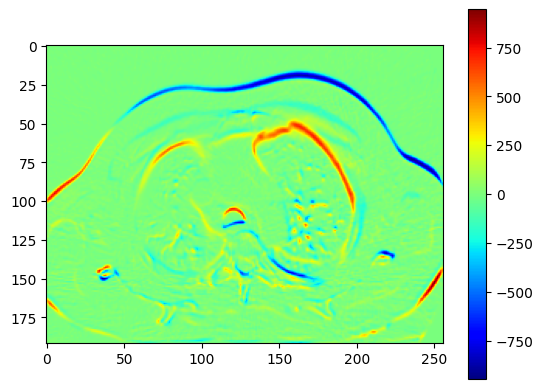

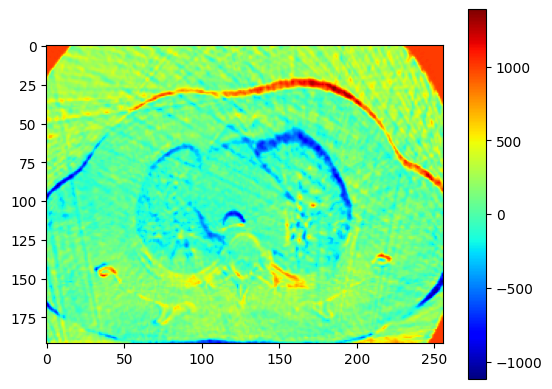

In [36]:
lung_expiration_slice = lung_expiration_array[slice_index, :, :]
lung_inspiration_slice = lung_inspiration_array[slice_index, :, :]
warped_inspiratory_lung_slice = warped_inspiratory_lung_array[slice_index, :, :]

diff = lung_inspiration_slice - warped_inspiratory_lung_slice
diff2 = lung_inspiration_slice - lung_expiration_slice

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(lung_inspiration_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(warped_inspiratory_lung_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(diff, cmap='jet')
plt.colorbar()
plt.show()

plt.imshow(diff2, cmap='jet')
plt.colorbar()
plt.show()

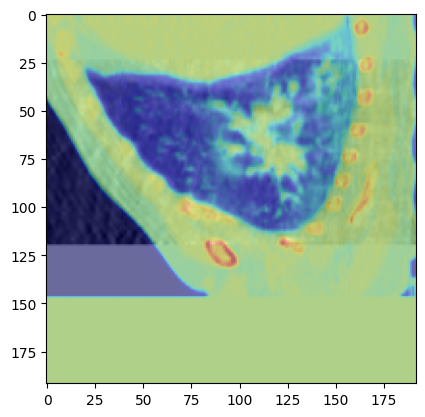

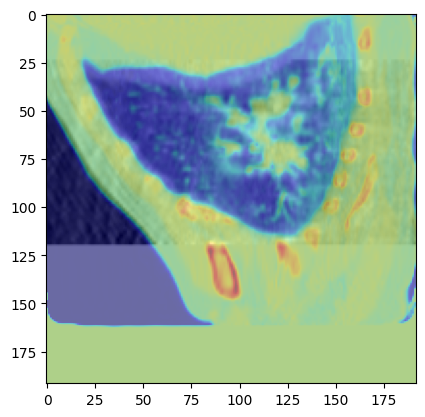

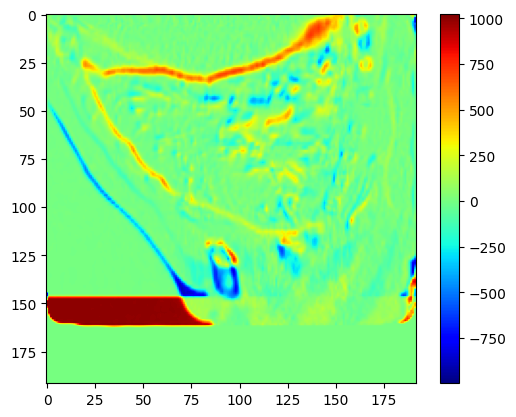

In [33]:
lung_expiration_slice = lung_expiration_array[: , :, slice_index]
lung_inspiration_slice = lung_inspiration_array[:, :, slice_index]
warped_inspiratory_lung_slice = warped_inspiratory_lung_array[:, :, slice_index]

diff = lung_inspiration_slice - warped_inspiratory_lung_slice

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(lung_inspiration_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(warped_inspiratory_lung_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(diff, cmap='jet')
plt.colorbar()
plt.show()

In [3]:
labels = nib.load("/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/AMS_Images/ThoraxCBCT_OncoRegRelease_06_12_23/Release_06_12_23/labelsTr/ThoraxCBCT_0011_0000.nii.gz")
labels_array = labels.get_fdata().astype(np.int32)
print(len(np.unique(labels_array)))

14


(3, 192, 192, 256)
(192, 192, 256)
(192, 192, 256, 3)


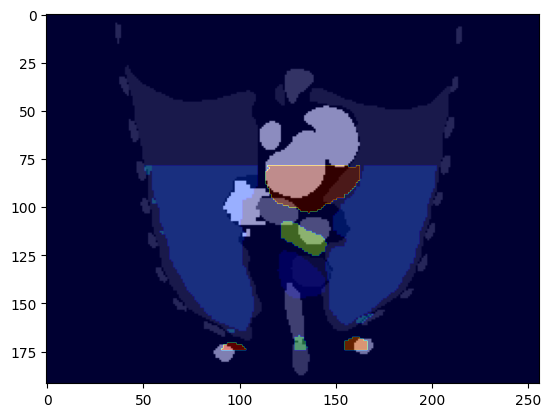

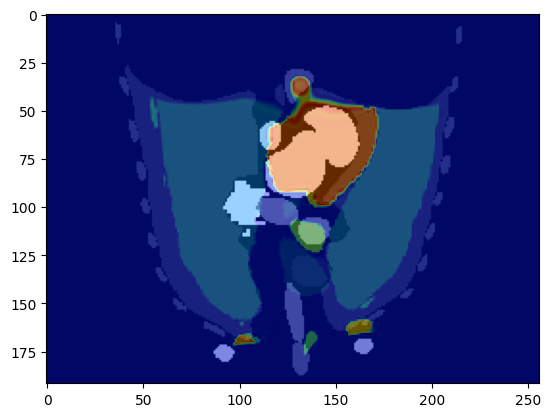

In [8]:
lung_expiration_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/AMS_Images/ThoraxCBCT_OncoRegRelease_06_12_23/Release_06_12_23/labelsTr/ThoraxCBCT_0011_0000.nii.gz' # Fixed image
lung_inspiration_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/AMS_Images/ThoraxCBCT_OncoRegRelease_06_12_23/Release_06_12_23/labelsTr/ThoraxCBCT_0011_0001.nii.gz' # Moving image

# Load the images
lung_expiration = sitk.ReadImage(lung_expiration_path)
lung_inspiration = sitk.ReadImage(lung_inspiration_path)

# Load displacement field
displacement_field = sitk.ReadImage('/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/AMS_Images/DisplacementFieldUNet/disp_0011_to_0011.nii.gz')

displacement_field_array = sitk.GetArrayFromImage(displacement_field)
lung_expiration_array = sitk.GetArrayFromImage(lung_expiration)
lung_inspiration_array = sitk.GetArrayFromImage(lung_inspiration)

print(displacement_field_array.shape)
print(lung_inspiration_array.shape)

displacement_field_array = np.transpose(displacement_field_array, (1, 2, 3, 0))
print(displacement_field_array.shape)
    
displacement_field_vector = sitk.GetImageFromArray(displacement_field_array, isVector=True)
    
displacement_field_vector.CopyInformation(lung_inspiration)
    
displacement_field_vector = sitk.Cast(displacement_field_vector, sitk.sitkVectorFloat64)
    
displacement_transform = sitk.DisplacementFieldTransform(displacement_field_vector)

warped_inspiratory_lung = sitk.Resample(
    lung_inspiration,
    lung_expiration,
    displacement_transform,
    sitk.sitkBSpline,
    0.0,
    lung_inspiration.GetPixelID()
)

warped_inspiratory_lung_array = sitk.GetArrayFromImage(warped_inspiratory_lung)

slice_index = 90
lung_expiration_slice = lung_expiration_array[: ,slice_index, :]
lung_inspiration_slice = lung_inspiration_array[:, slice_index, :]
warped_inspiratory_lung_slice = warped_inspiratory_lung_array[:, slice_index, :]

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(lung_inspiration_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(warped_inspiratory_lung_slice, cmap='jet', alpha=0.4)
plt.show()

In [ ]:
# Load the file
output_adam_path = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/AMS_Images/ConvexUNet/optimized_params.pt"
adam_data = torch.load(output_adam_path)

# Unpack the data correctly
rank_data, dice_data, jstd_data, hd95_data, t_convex_data = adam_data

print(rank_data.shape)
print(rank_data.numel())  # Total number of elements

best_rank_index = rank_data.argmax()
print("Best rank index: ", best_rank_index)
print("Best rank: ", rank_data[best_rank_index])
print("Best dice: ", dice_data[best_rank_index])
print("Best jstd: ", jstd_data[best_rank_index])
print("Best hd95: ", hd95_data[best_rank_index])



torch.Size([100])
100
Best rank index:  tensor(23)
Best rank:  tensor(0.6821)
Best dice:  tensor([0.5803, 0.3829])
Best jstd:  tensor([6.6779e-02, 7.4850e-07])
Best hd95:  tensor(38.0111)


/tmp/ipykernel_166497/859984951.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adam_data = torch.load(output_adam_path)


'\n# Print the results\nprint("\n--- Results Summary ---\n")\nprint(f"Best Rank: {rank_data_reshaped[best_config_idx].item()}")\nprint(f"Best Dice scores (mean, robust): {best_dice_scores[..., 0].tolist()}")\nprint(f"Best JSTD scores (mean, robust): {best_jstd_scores[..., 0].tolist()}")\nprint(f"Best HD95 scores: {best_hd95_scores.tolist()}")\n\nprint("\n--- Detailed Metrics for Best Configuration ---\n")\nprint(f"Dice Scores (mean, robust): {best_dice_scores}")\nprint(f"JSTD Scores (mean, robust): {best_jstd_scores}")\nprint(f"HD95 Scores: {best_hd95_scores}")\n'

In [16]:
output_adam_shift_splines_path = "/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/AMS_Images/AdamUNet/optimized_params_adam.pt"
optimization_results = torch.load(output_adam_shift_splines_path)

rank2, dice2, jstd2, hd95_2 = optimization_results

#print(rank2.shape)
#print(rank2.numel())  # Total number of elements

print("Best rank index: ", rank2.argmin())
print("Best rank: ", rank2.min())
print("Best dice: ", dice2.flatten()[dice2.argmax()])
print("Best jstd: ", jstd2.flatten()[jstd2.argmin()])
print("Best hd95: ", hd95_2.flatten()[hd95_2.argmax()])

Best rank index:  tensor(355)
Best rank:  tensor(0.1175)
Best dice:  tensor(0.7962)
Best jstd:  tensor(0.0131)
Best hd95:  tensor(28.2233)


/tmp/ipykernel_4452/726605690.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  optimization_results = torch.load(output_adam_shift_splines_path)


(3, 192, 192, 256)
(192, 192, 256)
(192, 192, 256, 3)


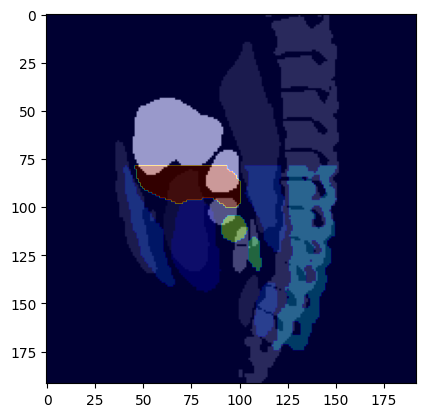

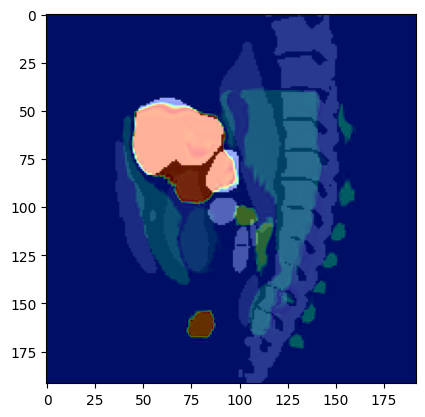

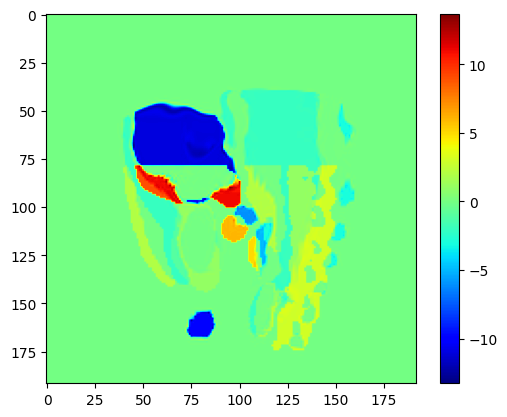

In [28]:
lung_expiration_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/AMS_Images/ThoraxCBCT_OncoRegRelease_06_12_23/Release_06_12_23/labelsTr/ThoraxCBCT_0011_0000.nii.gz' # Fixed image
lung_inspiration_path = '/home/adis/Desktop/Faks/AMS/AMS_Challenge/Data/AMS_Images/ThoraxCBCT_OncoRegRelease_06_12_23/Release_06_12_23/labelsTr/ThoraxCBCT_0011_0001.nii.gz' # Moving image

# Load the images
lung_expiration = sitk.ReadImage(lung_expiration_path)
lung_inspiration = sitk.ReadImage(lung_inspiration_path)

# Load displacement field
displacement_field = sitk.ReadImage('/home/adis/Desktop/Faks/AMS/AMS_Challenge/Results/AMS_Images/DisplacementFieldUNet/disp_0011_to_0011.nii.gz')

displacement_field_array = sitk.GetArrayFromImage(displacement_field)
lung_expiration_array = sitk.GetArrayFromImage(lung_expiration)
lung_inspiration_array = sitk.GetArrayFromImage(lung_inspiration)

print(displacement_field_array.shape)
print(lung_inspiration_array.shape)

displacement_field_array = np.transpose(displacement_field_array, (1, 2, 3, 0))
print(displacement_field_array.shape)
    
displacement_field_vector = sitk.GetImageFromArray(displacement_field_array, isVector=True)
    
displacement_field_vector.CopyInformation(lung_inspiration)
    
displacement_field_vector = sitk.Cast(displacement_field_vector, sitk.sitkVectorFloat64)
    
displacement_transform = sitk.DisplacementFieldTransform(displacement_field_vector)

warped_inspiratory_lung = sitk.Resample(
    lung_inspiration,
    lung_expiration,
    displacement_transform,
    sitk.sitkBSpline,
    0.0,
    lung_inspiration.GetPixelID()
)

warped_inspiratory_lung_array = sitk.GetArrayFromImage(warped_inspiratory_lung)

slice_index = 120
lung_expiration_slice = lung_expiration_array[:, :, slice_index]
lung_inspiration_slice = lung_inspiration_array[:, :, slice_index]
warped_inspiratory_lung_slice = warped_inspiratory_lung_array[:, :, slice_index]

diff = lung_inspiration_slice - warped_inspiratory_lung_slice



plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(lung_inspiration_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(lung_expiration_slice, cmap='gray')
plt.imshow(warped_inspiratory_lung_slice, cmap='jet', alpha=0.4)
plt.show()

plt.imshow(diff, cmap='jet')
plt.colorbar()
plt.show()

#sitk.WriteImage(warped_inspiratory_lung, "warped_AMS.nii.gz")